<a href="https://colab.research.google.com/github/dahlia52/ESAA_2022-2/blob/main/%EC%9D%98%EB%A5%98_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.tensorflow.org/tutorials/keras/classification?hl=ko

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


##패션 MNIST 데이터셋 임포트하기

In [14]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 탐색

In [5]:
train_images.shape # 28x28 픽셀 이미지 60000개

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels # 레이블은 0~9 

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

## 데이터 전처리

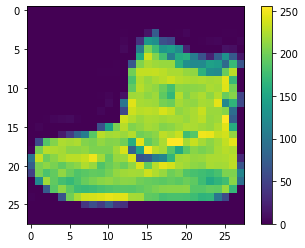

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar() # 픽셀 범위: 0~255 
plt.grid(False)
plt.show()

In [18]:
# 픽셀 범위를 0~1로 조정
train_images = train_images / 255.0
test_images = test_images / 255.0

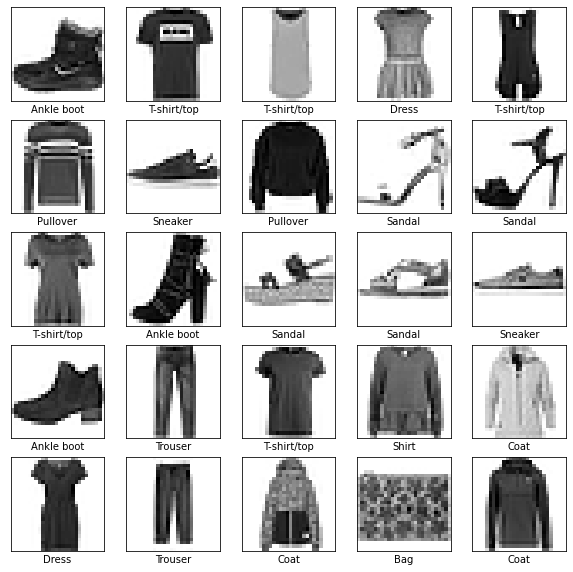

In [20]:
# 처음 25개 이미지와 클래스 이름 출력
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성

- 층 설정

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # 2차원 배열 이미지를 1차원으로 변환
    tf.keras.layers.Dense(128, activation='relu'), # 밀집 연결 (완전 연결) 층
    tf.keras.layers.Dense(10) # 10개의 노드의 소프트맥스 층 - 10개의 확률을 반환
])

- 모델 컴파일

In [26]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

## 모델 훈련

In [28]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5010 - accuracy: 0.8240
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3772 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3374 - accuracy: 0.8757
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3143 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2952 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2786 - accuracy: 0.8975
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2554 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2465 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

## 정확도 평가

In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3416 - accuracy: 0.8832 - 394ms/epoch - 1ms/step

Test accuracy: 0.8831999897956848


## 예측

In [30]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [31]:
predictions[0]

array([2.2076931e-09, 3.3770389e-12, 4.1835221e-10, 3.7148418e-12,
       2.5363422e-09, 8.0263751e-05, 1.6587174e-08, 2.6522747e-03,
       1.9956641e-07, 9.9726725e-01], dtype=float32)

In [32]:
# 가장 높은 신뢰도를 가진 레이블
np.argmax(predictions[0])

9

In [33]:
test_labels[0]

9

In [36]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color="blue"
  else:
    color="red"
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array),class_names[true_label], color=color))

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

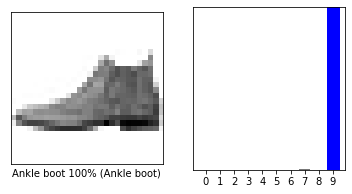

In [37]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

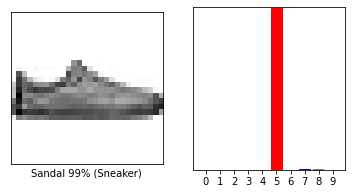

In [38]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

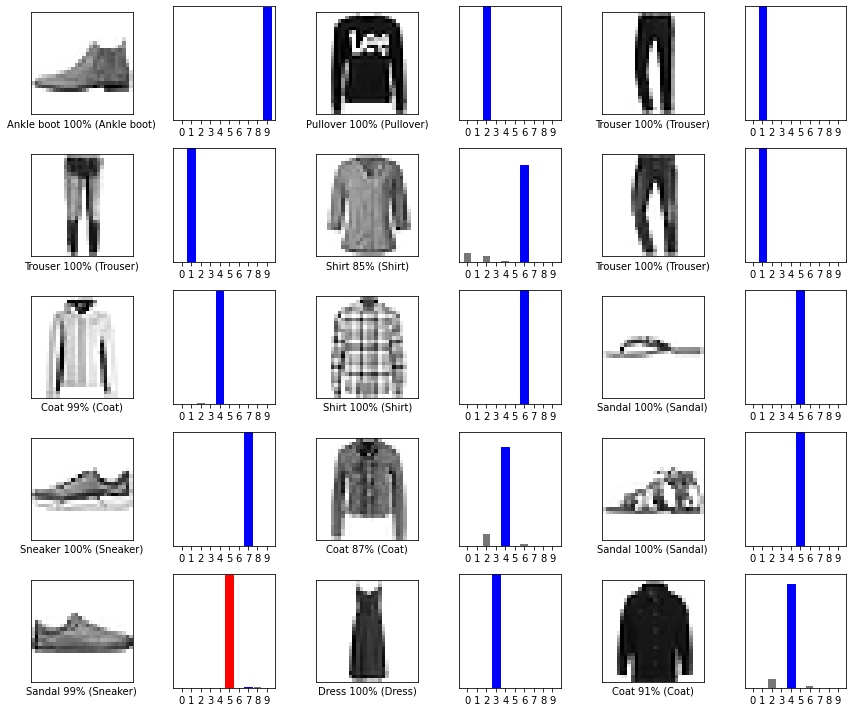

In [40]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

##훈련된 모델 사용하기

In [41]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [42]:
# 모델이 샘플의 묶음을 예측하도록 최적화되어 있으므로 하나의 이미지를 사용할 때에도 2차원 배열로 만들어줌.
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [43]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 14ms/step
[[3.34264878e-05 8.12132100e-13 9.99345839e-01 3.87490864e-12
  5.29937504e-04 3.42634212e-14 9.07664726e-05 1.36185947e-15
  1.03103515e-11 1.54268078e-14]]


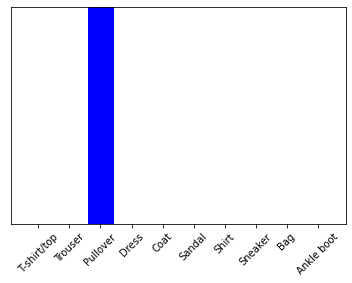

In [44]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [45]:
np.argmax(predictions_single[0])

2